
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# Proyecto Cliente Zuber

## Introducción  <a id='intro'></a>

Zuber es una nueva empresa de viajes compartidos que está a punto de lanzarse en Chicago. Nuestra misión es proporcionar un servicio eficiente, seguro y cómodo para nuestros pasajeros. Para lograrlo, estamos explorando patrones en la información disponible y evaluando el impacto de diversos factores en nuestros viajes.

## Objetivos del Proyecto <a id='target'></a>

1. Análisis de Datos de Competidores: Comenzaremos examinando los datos de los competidores en el mercado de viajes compartidos. Esto nos permitirá identificar tendencias, áreas de oportunidad y posibles brechas en el servicio.
2. Hipótesis sobre el Clima y la Frecuencia de Viajes: Una de nuestras hipótesis es que el clima puede afectar la demanda de viajes. Investigaremos si hay una correlación entre las condiciones climáticas (como lluvia, nieve o temperatura) y la cantidad de viajes realizados.



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Marco, excelente trabajo agregando una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

## Información General del Proyecto

### Carga de librerias

In [66]:
#caraga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene
from scipy.stats import ttest_ind

### Carga de base de datos

In [67]:
#carga de base de datos cantidad de viajes por companía
trips_by_company = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_by_company.head()


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [68]:
#carga de base de datos de tiempos promedio de viajes por barrio
avgtrips_by_location = pd.read_csv('/datasets/project_sql_result_04.csv')
avgtrips_by_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [69]:
#carga de base de datos de duración de viajes por condición climática
duration_trips_by_weather = pd.read_csv('/datasets/project_sql_result_07.csv')
duration_trips_by_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparación de los Datos

### Verificación de tipo de datos

In [70]:
trips_by_company.info() #muestra información por cantidad de viajes por companía


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [71]:
avgtrips_by_location.info() #muestra información de promedio de duración de viaje por locación

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [72]:
duration_trips_by_weather.info() #muestra información de la tabla de duración de los viajes por condición climática

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### Verificar Duplicados

In [73]:
#verifica duplicados en la tabla de viajes por companía
trips_by_company[trips_by_company.duplicated(keep=False)]

,company_name,trips_amount


In [74]:
#verifica duplicados en la tabla de viajes promedio por barrio
avgtrips_by_location[avgtrips_by_location.duplicated(keep=False)]

,dropoff_location_name,average_trips


In [75]:
#verifica duplicados en la tabla de duración de viajes por condición climática
duration_trips_by_weather[duration_trips_by_weather.duplicated(keep=False)]

,start_ts,weather_conditions,duration_seconds
4,2017-11-11 07:00:00,Good,1440.0
8,2017-11-11 14:00:00,Good,2460.0
10,2017-11-18 06:00:00,Good,1500.0
16,2017-11-04 12:00:00,Good,2640.0
23,2017-11-04 14:00:00,Good,3360.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [76]:
duration_trips_by_weather = duration_trips_by_weather.drop_duplicates()
duration_trips_by_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB


* Se puede ver que los datasets no contienen información faltante y que el tipo de datos es el correcto para el análisis posterior que se realizará
* La información la duración de los viajes por clima contiene una columna de fecha que no será convertida a formato datetime ya que no se trabajará con este dato en este proyectom por tanto no es necesario
* Se verifican duplicados sobre los datasets y no existen novedades en sobre la información de viajes por companía ni en el tiempo de viajes por barrio, pero se encuentran duplicados en la información sobre tiempos de duración de viaje por condición climática y se proceden con la eliminación de los mismo para evitar errores en el análisis posterior

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



<div class="alert alert-block alert-info">
<b>Siguiendo la recomendación del revisor se verifican duplicados sobre los datasets donde se encontraron datos que podrían afectar las conclusiones de nuestro análisis, para evitar esto se han eliminado.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Análsis de datos

### Identificar top 10 de barrios en términos de finalización del recorrido

In [77]:
#muestra el top 10 de locaciones con mayor tiempo de finalización de recorrido
top10_time = avgtrips_by_location.sort_values(by = "average_trips").tail(10) 
top10_time

,dropoff_location_name,average_trips
9,Sheffield & DePaul,1259.766667
8,Gold Coast,1364.233333
7,Museum Campus,1510.000000
6,Grant Park,2068.533333
5,Lake View,2420.966667
4,O'Hare,2546.900000
3,West Loop,5163.666667
2,Streeterville,6664.666667
1,River North,9523.666667
0,Loop,10727.466667


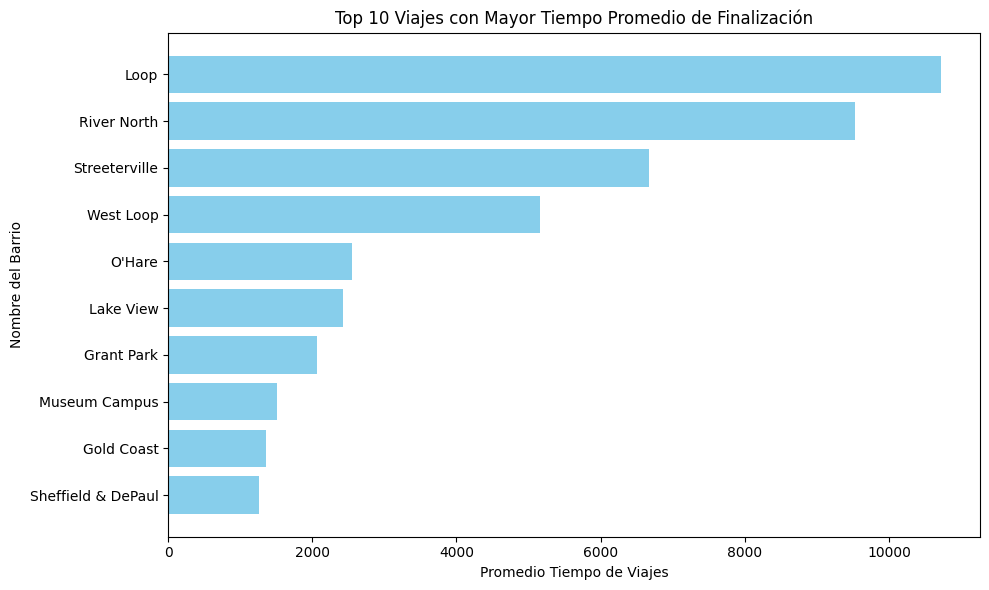

In [78]:
# Datos de los 10 viajes con mayor promedio de frecuencia
tiempo = top10_time["average_trips"]
barrios = top10_time["dropoff_location_name"]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
ax.barh(barrios, tiempo, color="skyblue")

# Personalizar el gráfico
ax.set_xlabel("Promedio Tiempo de Viajes")
ax.set_ylabel("Nombre del Barrio")
ax.set_title("Top 10 Viajes con Mayor Tiempo Promedio de Finalización")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

In [79]:
trips_by_company.head() #muestra la cabecera la tabla que muestra la cantidad de viajes por companía

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Identificar top 10 de empresas de taxis con mayor número de viajes

In [80]:
#genera el top 10 de la empresas de taxis con mayor número de viajes
top10_trips = trips_by_company.sort_values(by = "trips_amount").tail(10)
top10_trips

,company_name,trips_amount
9,Blue Ribbon Taxi Association Inc.,5953
8,Star North Management LLC,7455
7,Sun Taxi,7701
6,City Service,8448
5,Chicago Carriage Cab Corp,9181
4,Taxi Affiliation Service Yellow,9299
3,Yellow Cab,9888
2,Medallion Leasing,10367
1,Taxi Affiliation Services,11422
0,Flash Cab,19558


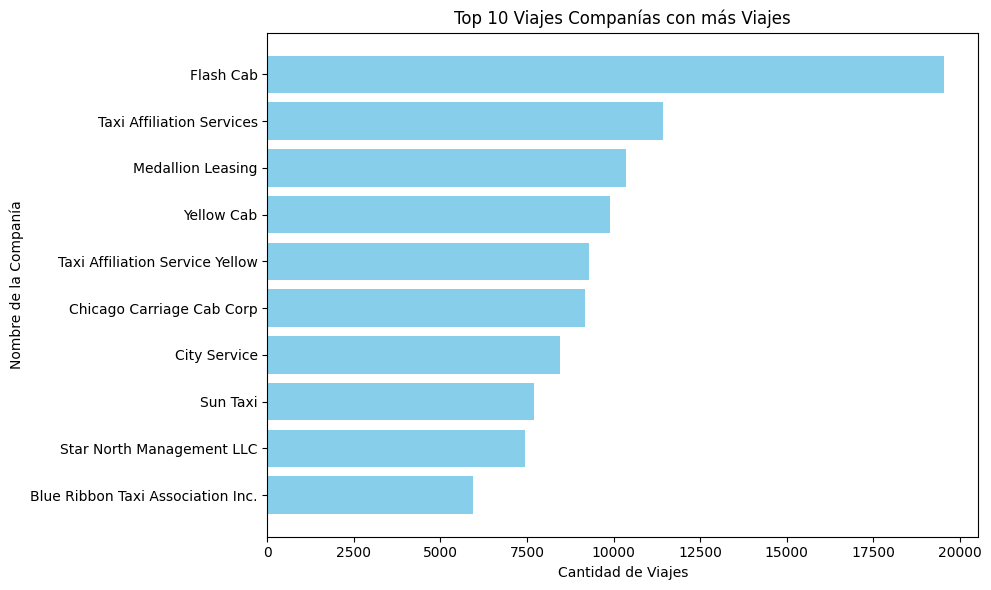

In [81]:
# Datos de las 10 empresas con mayor número de viajes
viajes = top10_trips["trips_amount"]
empresas = top10_trips["company_name"]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
ax.barh(empresas, viajes, color="skyblue")

# Personalizar el gráfico
ax.set_xlabel("Cantidad de Viajes")
ax.set_ylabel("Nombre de la Companía")
ax.set_title("Top 10 Viajes Companías con más Viajes")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

* Del análisis realizado sobre los datos de los barrios con mayor tiempo de finalización de recorrido, el barrio de Loop se ubica en el top, seguido por Rivernoth y Streeterville cuya duración está aproximadamente 40% abajo del tiempo que general Loop

* Adicional, de entre las empresas de transporte más demandadas por cantidad de viajes, encontramos a Flash Cab como el líder indiscutible, con el 40% más de viajes que la segunda companía que es Taxi Affiliation Services y muy cerca de ésta, se encuentra Medallion Leasing.

## Prueba de Hipótesis

### Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [82]:
duration_trips_by_weather.info() #muestra información del dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB


In [83]:
#verifica si las varianzas de las poblaciones son iguales
#filtra por condición climática
bad_weather = duration_trips_by_weather.query("weather_conditions == 'Bad'")["duration_seconds"]
good_weather = duration_trips_by_weather.query("weather_conditions == 'Good'")["duration_seconds"]

alpha = 0.05 #nivel de significancia

#determina si las varianzas son iguales
bad_weather1 = bad_weather.reset_index()
good_weather1 = good_weather.reset_index()
test = levene(bad_weather1['duration_seconds'], good_weather1['duration_seconds'])
if test.pvalue < alpha:
    print("Las varianzas no son iguales")
else:
    
    print("No se puede rechazar la hipótesis sobre las varianzas")
    print()




No se puede rechazar la hipótesis sobre las varianzas



In [84]:
alpha = 0.05 #nivel de significancia asumido

#evalúa con el método ttest las poblaciones de las condiciones climáticas 'Bad' o 'Good'
stat, p_value = ttest_ind(
    duration_trips_by_weather.query("weather_conditions == 'Bad'")["duration_seconds"],
    duration_trips_by_weather.query("weather_conditions == 'Good'")["duration_seconds"], equal_var=True
)

print(f'El valor p_value es: {p_value}')
print()

#compara el valor p_value del ttest con el nivel de significancia
if p_value < alpha:
    print('Se descarta hipótesis nula')
else:
    print('No se puede desacartar la hipótesis')
    
    

El valor p_value es: 7.397770692813658e-08

Se descarta hipótesis nula


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-info">
<b>Siguiendo la recomendación del revisor y usando la prueba de Levene se pudo verificar que las varianzas son iguales cuyo dato se usa en el ttest</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [85]:
#Obtiene el promedio de duración de viajes agrupado por condición climática
weather_trips = duration_trips_by_weather.groupby('weather_conditions')['duration_seconds'].mean().reset_index()
weather_trips

,weather_conditions,duration_seconds
0,Bad,2409.229730
1,Good,2032.253112


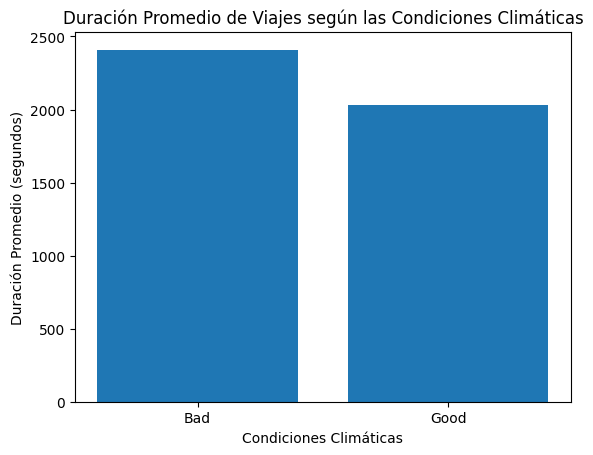

In [86]:
# Gráfico de duración promedio de viajes según las condiciones climáticas
weather_conditions = weather_trips['weather_conditions']
duracion_promedio = weather_trips['duration_seconds']

# Crea un gráfico de barras
plt.bar(weather_conditions, duracion_promedio)
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración Promedio (segundos)')
plt.title('Duración Promedio de Viajes según las Condiciones Climáticas')
plt.show()

* Para plantear la hipótesis nula y alternativa, partimos del supuesto de que el comportamiento del clima NO incide sobre la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional de O'Hare, es decir las medias de ambas poblaciones son iguales

* El resultado dependerá del resultado del ttest donde se evalúan las medias de ambas poblaciones y la comparación con el nivel de significancia que para este caso se ha establecido en 0.05 

* Luego del análisis, hemos obtenido que indica que se descarta la hipótesis nula, esto quiere decir que el clima si afecta la duración promedio de los viajes entre el Loop y el aeropuerto de O'Hare

* Como refuerzo a nuestra hipótesis, se ha elaborado un diagrama de barras que nos confirma que efectivamente el promedio de viajes duran más los días con malas condiciones climáticas

## Conclusiones Generales

* En el análisis de la competencia, podemos ver que la companía de taxis Flash Cab es el principal competidor con el que tendríamos que lidiar y al que deberíamos ponerle especial cuidado ya que está aproximdamente 40% sobre la companía que sigue en segundo lugar que es Taxi Affiliation Services, el resto de companías están por debajo de estos valores

* Otro punto importante a tener en cuenta son los tramos de viajes que tienen mayor tiempo de duración, lo que nos dará una idea clara de donde deberán ubicarse nuestras unidades con más freciencia si queremos maximizar nuestras ganancias, de hecho barrios como Loop, River North y Streeterville se destacan en este análisis

* Por último, un dato importante que nos deja nuestro análisis de hipótesis y que lo comprobamos adicionalmente con una gráfica, es que el tiempo promedio por viaje aumenta de acuerdo con el clima, denotando así que en días lluviosos o de mal clima, los promedios por viaje aumentan, aproximadamente 20% adicional que en día con buenas condiciones climáticas, dato que podríamos usar a nuestro favor para elaborar nuestro algortimo de cobros basado en condiciones climáticas por ejemplo.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>